In [1]:
import numpy as np
from scipy.linalg import cholesky
import matplotlib.pyplot as plt

In [2]:
def Cholesky_Check(matrix):
    # First check if the matrix is asymmetrical
    if not np.allclose(matrix, matrix.T):
        return False
    try:
        cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

In [3]:
def GD(f, grad_f, x0, iterations=100, tol = 1e-4, alpha = 000.1):
    xi = x0
    x = np.array([xi])
    for i in range(1, iterations):
        grad = grad_f(xi) 
        x_n = xi - alpha * grad
        x = np.append(x, x_n)
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i} iterations.")
            xi = x_n  
            break
        xi = x_n

    computed_optimum = x[-1]
    distance_history = [np.linalg.norm(xu - computed_optimum) for xu in x]
    

    # Output the results
    print(f"Computed optimum using gradient descent: {computed_optimum}")
    print(f"f(x) at computed optimum: {f(computed_optimum)}")

    # Plotting the convergence of the algorithm
    plt.figure(figsize=(10, 6))
    plt.plot(distance_history, label='Distance to Computed Optimum', color='blue')
    plt.title('Convergence of Gradient Descent')
    plt.xlabel('Iteration')
    plt.ylabel('Distance to Computed Optimum')
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
def GD_B(f, grad_f, x0, iterations=100, tol=1e-4, alpha = 1e-3, c=1e-4, rho = 0.01):
    xi = x0
    x = np.array([xi])
    alpha_list = np.array([alpha])
    for i in range(iterations):
        grad = grad_f(xi)
        pk = -grad
        alpha_i = alpha
        while f(xi + alpha_i * pk) > f(xi) + c * alpha_i * np.dot(grad, pk):
            alpha_i *= rho
        alpha_list = np.append(alpha_list, alpha_i)
        x_n = xi - alpha_i * grad
        x = np.append(x, x_n)
        
        if np.linalg.norm(grad_f(x_n)) < tol:
            print(f"Converged in {i+1} iterations.")
            xi = x_n  # Update x_i to the latest value before breaking
            break
	# The computed optimum is the last value of x
    final_x = x[-1]

    # Compute the distances from each x value in the iteration history to the computed optimum
    distance_history = [np.linalg.norm(xu - final_x) for xu in x]

    # Output the results
    print(f"Computed optimum using gradient descent: {final_x}")
    print(f"f(x) at computed optimum: {f(final_x)}")
    print(f"Final value of alpha = {alpha_list[-1]}")

    # Plotting the results as subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history,
                label='Distance to Computed Optimum', color='blue')
    axs[0].set_title(
        'Convergence of Gradient Descent with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_list, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()
    
    

In [30]:
# def nm_w_bls(f, f_grad, f_hess, x0, max_iter=1000, tol=1e-4, alpha_init=0.001, rho=0.1, gamma=0):
def Newton(f, grad_f, hess_f, x0, iterations=100, tol=1e-4, alpha=1e-3, rho=0.1, gamma=0, c = 1e-4):
    
    """
    Newton's Method with Backtracking Line Search (BLS) to find the local minimum of a function.

    This function minimizes the input function `f` using its gradient `f_grad`, its Hessian `f_hess`,
    and an initial guess `x0`. It uses Newton's method with backtracking line search to dynamically adjust
    the step size (`alpha`). It also handles cases where the Hessian is not positive definite by applying 
    regularization with a parameter `gamma`.

    Args:
        f (callable): The function to be minimized. It should take a vector as input and return a scalar.
        f_grad (callable): The gradient of the function `f`. It should take a vector as input and return a vector.
        f_hess (callable): The Hessian (second derivative) of the function `f`. It should take a vector as input and return a matrix.
        x0 (array-like): The initial guess for the minimum, a vector of the same dimensions as the input of `f`.
        max_iter (int, optional): The maximum number of iterations to perform. Defaults to 1000.
        tol (float, optional): The tolerance for convergence. The algorithm stops if the norm of the gradient
                               is below this value. Defaults to 1e-4.
        alpha_init (float, optional): The initial step size for the Newton update. Defaults to 0.001.
        rho (float, optional): The reduction factor for the step size in the backtracking line search. Defaults to 0.1.
        gamma (float, optional): The regularization parameter to handle cases when the Hessian is not positive definite. Defaults to 0.

    Returns:
        None: The function outputs the computed optimum, final step size, and plots convergence graphs.
    """
    xi = x0
    x = np.array([xi])
    alpha_list = np.array([alpha])
    for i in range(iterations):
        grad = grad_f(xi)
        hess = hess_f(xi)
        if isinstance(xi, np.ndarray):
            if Cholesky_Check(hess):
                pk = np.linalg.solve(hess, -grad)
            else:
                pk = np.linalg.solve(hess + gamma*np.eye(hess.shape[0]), -grad)
        else:
            if hess<0:
                pk = -(grad/(hess+gamma))
            else:
                pk = -(grad/hess)
        alpha_i = alpha
        while f(xi + alpha_i * pk) > f(xi) + c*alpha_i*np.dot(grad, pk):
            alpha_i *= rho  # Reduce alpha by factor rho until the condition is satisfied

        alpha_list = np.append(alpha_list, alpha_i)  # Record the value of alpha

        # Update x_i using the determined step size
        x_n = xi + alpha_i * pk

        # Store the new value of x for plotting later
        x = np.append(x, x_n)

        # Check for convergence: if the norm of the gradient is below the tolerance
        if np.linalg.norm(grad_f(x_n)) < tol:
            print(f"Converged in {i} iterations.")
            xi = x_n  # Update x_i to the latest value before breaking
            break

        # Update x_i for the next iteration
        xi = x_n
    else:
        # This block executes if the loop did not break, indicating no convergence within max_iter
        print("Did not converge within the maximum number of iterations.")

    # The computed optimum is the last value of x
    computed_optimum = x[-1]

    # Compute the distances from each x value in the iteration history to the computed optimum
    distance_history = [np.linalg.norm(xu - computed_optimum) for xu in x]

    # Output the results
    print(f"Computed optimum using Newton's method: {computed_optimum}")
    print(f"f(x) at computed optimum: {f(computed_optimum)}")
    print(f"Final value of alpha = {alpha_list[-1]}")

    # Plotting the results as subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    # Subplot 1: Convergence of the distance to the computed optimum
    axs[0].plot(distance_history,
                label='Distance to Computed Optimum', color='blue')
    axs[0].set_title(
        'Convergence of Newton\'s Method with Backtracking Line Search')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance to Computed Optimum')
    axs[0].grid(True)
    axs[0].legend()

    # Subplot 2: Value of alpha in the backtracking line search
    axs[1].plot(alpha_list, label='Alpha (Step Size)', color='green')
    axs[1].set_title('Value of Alpha in Backtracking Line Search')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Alpha (Step Size)')
    axs[1].grid(True)
    axs[1].legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

Converged in 71 iterations.
Computed optimum using Newton's method: 1.0000471251429317
f(x) at computed optimum: -0.9999999977792209
Final value of alpha = 0.1


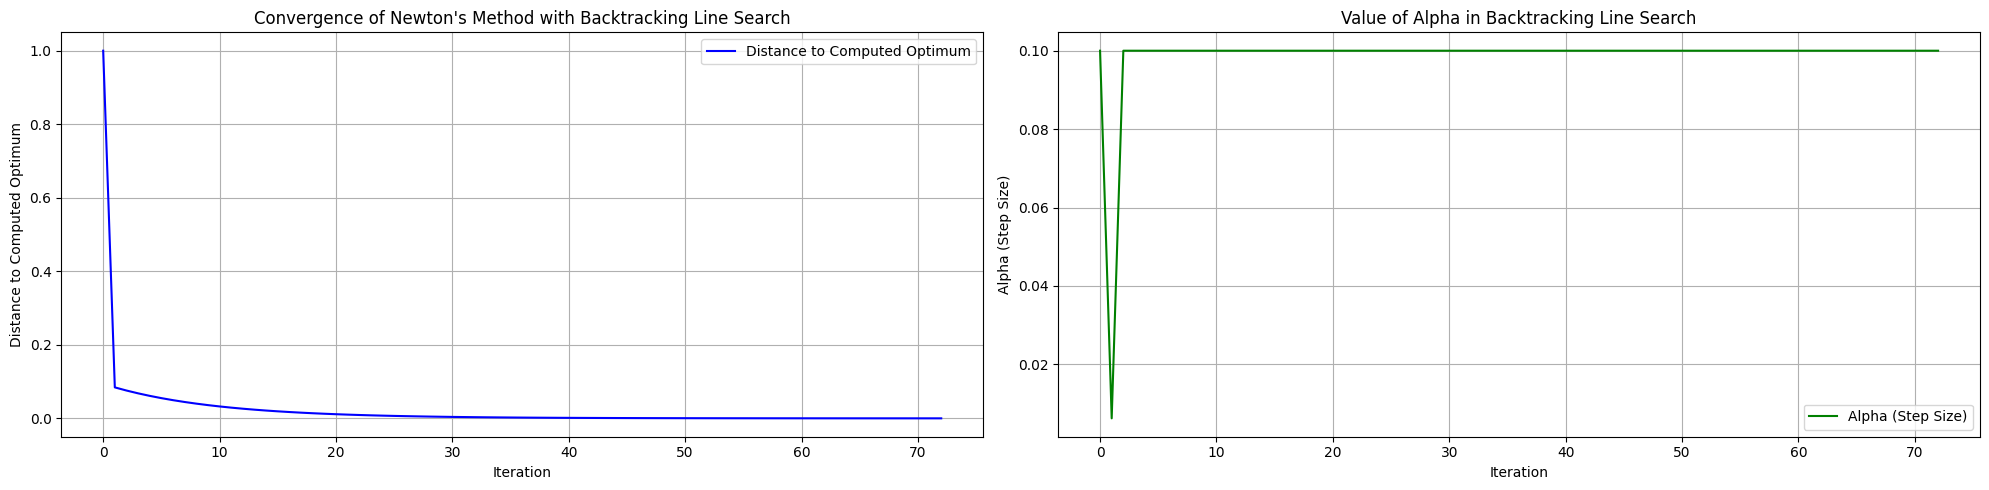

In [38]:
def f1(x):
    """Objective function f(x) = -exp(-((x - 1)^2))"""
    return -np.exp(-((x - 1)**2))


def f1_gradient(x):
    """Gradient of the objective function f(x)"""
    return 2 * (x - 1) * np.exp(-((x - 1)**2))


def f1_hessian(x):
    """Hessian of the objective function f(x)"""
    return (2 * np.exp(-((x - 1)**2)) - np.exp(-((x - 1)**2)) * (2 * x - 2)**2)

# GD(f = f1, grad_f=f1_gradient, x0=0, iterations=100)
# GD_B(f=f1, grad_f=f1_gradient, x0=0, alpha=0.1, iterations=100)
Newton(f=f1, grad_f=f1_gradient, hess_f=f1_hessian,x0=0, alpha=0.1, rho=0.5, gamma=74e-2)